# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Trying-to-use-Unsupervised-Learning-algorithms-for-a-Gaussian-bandit-problem" data-toc-modified-id="Trying-to-use-Unsupervised-Learning-algorithms-for-a-Gaussian-bandit-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Trying to use Unsupervised Learning algorithms for a Gaussian bandit problem</a></div><div class="lev2 toc-item"><a href="#Creating-the-Gaussian-bandit-problem" data-toc-modified-id="Creating-the-Gaussian-bandit-problem-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creating the Gaussian bandit problem</a></div><div class="lev2 toc-item"><a href="#Getting-data-from-a-first-phase-of-uniform-exploration" data-toc-modified-id="Getting-data-from-a-first-phase-of-uniform-exploration-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Getting data from a first phase of uniform exploration</a></div><div class="lev2 toc-item"><a href="#Fitting-an-Unsupervised-Learning-algorithm" data-toc-modified-id="Fitting-an-Unsupervised-Learning-algorithm-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Fitting an Unsupervised Learning algorithm</a></div><div class="lev2 toc-item"><a href="#Using-the-prediction-to-decide-the-next-arm-to-sample" data-toc-modified-id="Using-the-prediction-to-decide-the-next-arm-to-sample-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Using the prediction to decide the next arm to sample</a></div><div class="lev2 toc-item"><a href="#Implementing-a-Policy-from-that-idea" data-toc-modified-id="Implementing-a-Policy-from-that-idea-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Implementing a Policy from that idea</a></div><div class="lev3 toc-item"><a href="#Basic-algorithm" data-toc-modified-id="Basic-algorithm-151"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Basic algorithm</a></div><div class="lev3 toc-item"><a href="#A-variant" data-toc-modified-id="A-variant-152"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>A variant</a></div><div class="lev3 toc-item"><a href="#Implementation" data-toc-modified-id="Implementation-153"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Implementation</a></div><div class="lev2 toc-item"><a href="#Comparing-its-performance-on-this-Gaussian-problem" data-toc-modified-id="Comparing-its-performance-on-this-Gaussian-problem-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Comparing its performance on this Gaussian problem</a></div><div class="lev3 toc-item"><a href="#Configuring-an-experiment" data-toc-modified-id="Configuring-an-experiment-161"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Configuring an experiment</a></div><div class="lev3 toc-item"><a href="#Running-an-experiment" data-toc-modified-id="Running-an-experiment-162"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Running an experiment</a></div><div class="lev3 toc-item"><a href="#Visualizing-the-results" data-toc-modified-id="Visualizing-the-results-163"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Visualizing the results</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Conclusion</a></div>

----
# Trying to use Unsupervised Learning algorithms for a Gaussian bandit problem

This small [Jupyter notebook](https://www.jupyter.org/) presents an experiment, in the context of [Multi-Armed Bandit problems](https://en.wikipedia.org/wiki/Multi-armed_bandit) (MAB).

[I am](http://perso.crans.org/besson/) trying to answer a simple question:

> "Can we use generic unsupervised learning algorithm, like [Kernel Density estimation](http://scikit-learn.org/stable/modules/density.html) or [Ridge Regression](http://scikit-learn.org/stable/modules/linear_model.html), instead of MAB algorithms like [UCB](http://sbubeck.com/SurveyBCB12.pdf) or [Thompson Sampling](https://en.wikipedia.org/wiki/Thompson_sampling) ?

I will use my [AlgoBandits](http://banditslilian.gforge.inria.fr/) library, for which a complete documentation is available, [here at http://banditslilian.gforge.inria.fr/](http://banditslilian.gforge.inria.fr/), and the [scikit-learn package](http://scikit-learn.org/).

## Creating the Gaussian bandit problem
First, be sure to be in the main folder, and import the [`MAB` class](http://banditslilian.gforge.inria.fr/docs/Environment.MAB.html#Environment.MAB.MAB) from [the `Environment` package](http://banditslilian.gforge.inria.fr/docs/Environment.html#module-Environment):

In [1]:
import numpy as np

In [2]:
from sys import path
path.insert(0, '..')

In [3]:
from Environment import MAB

 - Setting dpi of all figures to 110 ...
 - Setting 'figsize' of all figures to (19.8, 10.8) ...
Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...


And also, import the [`Gaussian` class](http://banditslilian.gforge.inria.fr/docs/Arms.Gaussian.html#Arms.Gaussian.Gaussian) to create Gaussian-distributed arms.

In [4]:
from Arms import Gaussian

Info: numba.jit seems to be available.


In [5]:
# Just improving the ?? in Jupyter. Thanks to https://nbviewer.jupyter.org/gist/minrk/7715212
from __future__ import print_function
from IPython.core import page
def myprint(s):
    try:
        print(s['text/plain'])
    except (KeyError, TypeError):
        print(s)
page.page = myprint

In [6]:
Gaussian?

Init signature: Gaussian(mu, sigma=0.05, mini=0, maxi=1)
Docstring:     
Gaussian distributed arm, possibly truncated.

- Default is to truncate into [0, 1] (so Gaussian.draw() is in [0, 1]).
Init docstring: New arm.
File:           ~/ownCloud/cloud.openmailbox.org/Thèse_2016-17/src/AlgoBandits.git/Arms/Gaussian.py
Type:           type



Let create a simple bandit problem, with 3 arms, and visualize an histogram showing the repartition of rewards.

In [7]:
means = [0.45, 0.5, 0.55]
M = MAB(Gaussian(mu, sigma=0.2) for mu in means)

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = <generator object <genexpr> at 0x7f986ff14518> ...
 - with 'arms' = [G(0.45, 0.2), G(0.5, 0.2), G(0.55, 0.2)]
 - with 'means' = [ 0.45  0.5   0.55]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.55
 - with 'minArm' = 0.45

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 12 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 61.67% ...
 - with 'arms' represented as: $[G(0.45, 0.2), G(0.5, 0.2), G(0.55, 0.2)^*]$


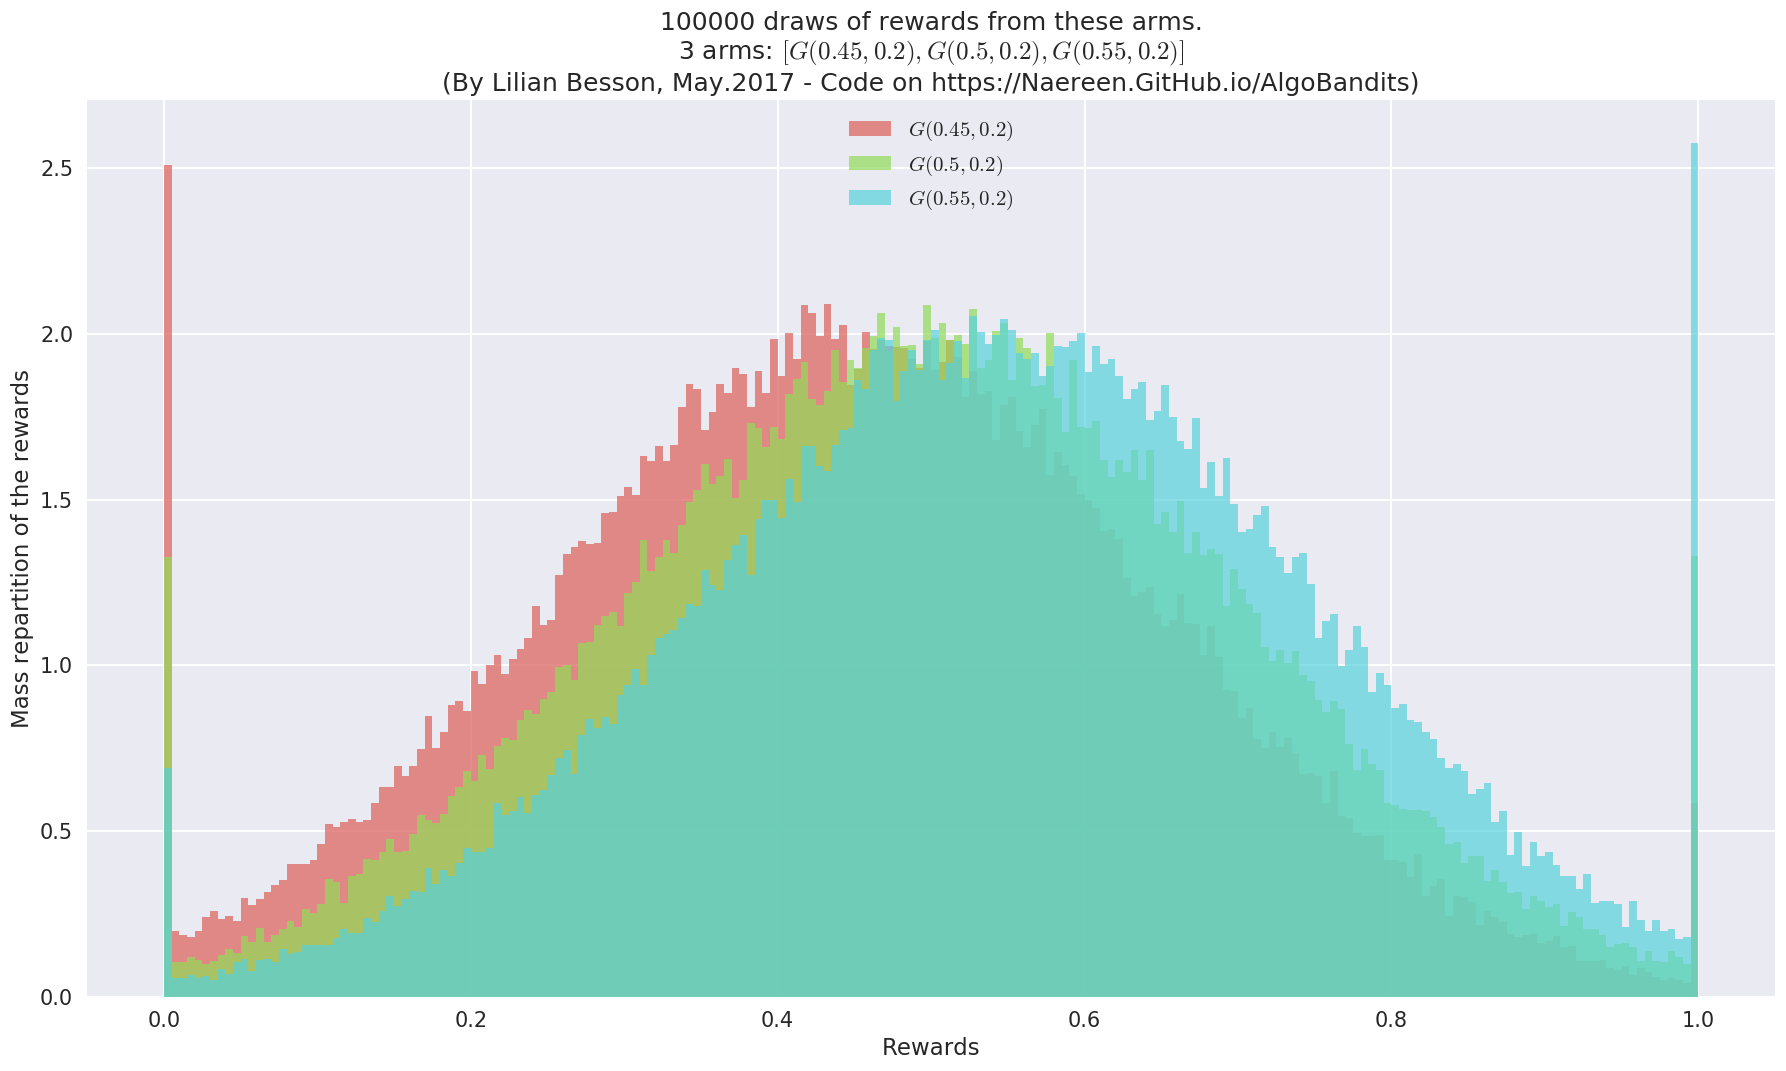

In [8]:
M.plotHistogram(horizon=100000)

> As we can see, the rewards of the different arms are close. It won't be easy to distinguish them.

Then we can generate some draws, from all arms, from time $t=1$ to $t=T_0$, for let say $T_0 = 1000$ :

In [9]:
T_0 = 1000
shape = (T_0,)
draws = np.array([ b.draw_nparray(shape) for b in M.arms ])

In [10]:
draws

array([[ 0.53352038,  0.51953445,  0.4022703 , ...,  0.59567498,
         0.19823004,  0.49445835],
       [ 0.35318382,  0.6388169 ,  0.74829958, ...,  0.90540226,
         0.62471989,  0.99276006],
       [ 0.55535405,  0.74477266,  0.74862057, ...,  0.48474884,
         0.55455887,  0.57973912]])

The *empirical means* of each arm can be estimated, quite easily, and could be used to make all the decisions from $t \geq T_0 + 1$.

In [11]:
empirical_means = np.mean(draws, axis=1)

In [12]:
empirical_means

array([ 0.44994536,  0.49145543,  0.54327896])

Clearly, the last arm is the best. And the empirical means $\hat{\mu}_k(t)$ for $k=1,\dots,K$, are really close to the true one, as $T_0 = 1000$ is quite large.

In [13]:
def relative_error(x, y):
    return np.abs(x - y) / x

In [14]:
relative_error(means, empirical_means)

array([ 0.00012142,  0.01708914,  0.01222007])

That's less than $3\%$ error, it's already quite good!

*Conclusion* : If we have "enough" samples, and the distribution are not too close, there is no need to do any learning: just pick the arm with highest mean, from now on, and you will be good!

In [15]:
best_arm_estimated = np.argmax(empirical_means)
best_arm = np.argmax(means)
assert best_arm_estimated == best_arm, "Error: the best arm is wrongly estimated, even after {} samples.".format(T_0)

----
## Getting data from a first phase of uniform exploration

But maybe $T_0 = 1000$ was really too large...

Let assume that the initial data was obtained from an algorithm which starts playing by exploring every arm, uniformly at random, until it gets "enough" data.

- On the one hand, if we ask him to sample each arm $1000$ times, of course the empirical mean $\hat{\mu_k(t)}$ will correctly estimate the true mean $\mu_k$ (if the gap $\Delta = \min_{i \neq j} |\mu_i - \mu_j|$ is not too small).
- But on the other hand, starting with a long phase of uniform exploration will increase dramatically the regret.

What if we want to use the same technique on very few data?
Let see with $T_0 = 10$, if the empirical means are still as close to the true ones.

In [16]:
np.random.seed(10000)  # for reproducibility of the error best_arm_estimated = 1
T_0 = 10
draws = np.array([ b.draw_nparray((T_0, )) for b in M.arms ])
empirical_means = np.mean(draws, axis=1)
empirical_means

array([ 0.42070333,  0.51071708,  0.50317952])

In [17]:
relative_error(means, empirical_means)
best_arm_estimated = np.argmax(empirical_means)
best_arm_estimated
assert best_arm_estimated == best_arm, "Error: the best arm is wrongly estimated, even after {} samples.".format(T_0)

array([ 0.06510371,  0.02143416,  0.08512815])

1

AssertionError: Error: the best arm is wrongly estimated, even after 10 samples.

Clearly, if there is not enough sample, the [*empirical mean* estimator](http://banditslilian.gforge.inria.fr/docs/Policies.EmpiricalMeans.html#Policies.EmpiricalMeans.EmpiricalMeans) *can* be wrong.
It will not always be wrong with so few samples, but it can.

----
## Fitting an Unsupervised Learning algorithm

We should use the initial data for more than just getting empirical means.

Let use a simple *Unsupervised Learning* algorithm, implemented in the [scikit-learn (`sklearn`)](http://scikit-learn.org/) package: [1D Kernel Density estimation](http://scikit-learn.org/stable/modules/density.html).

In [18]:
from sklearn.neighbors.kde import KernelDensity

First, we need to create a model.

Here we assume to know that the arms are Gaussian, so fitting a Gaussian kernel will probably work the best.
The `bandwidth` parameter should be of the order of the variances $\sigma_k$ of each arm (we used $0.2$).

In [19]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.2)
kde

KernelDensity(algorithm='auto', atol=0, bandwidth=0.2, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

Then, we will feed it the initial data, obtained from the initial phase of uniform exploration, from $t = 1, \dots, T_0$.

In [20]:
draws
draws.shape

array([[ 0.19578187,  0.48522741,  0.39075672,  0.51538576,  0.25531612,
         0.4955362 ,  0.28613439,  0.47144451,  0.64505553,  0.46639478],
       [ 0.40467549,  0.20156569,  0.41930701,  0.63895565,  0.54243056,
         0.51819797,  0.19022907,  0.49103453,  0.81135267,  0.88942214],
       [ 0.39297198,  0.12215761,  0.29714829,  0.60899744,  0.71129785,
         0.60553406,  0.30123099,  0.70745487,  0.70040608,  0.584596  ]])

(3, 10)

We need to use the transpose of this array, as the data should have shape `(n_samples, n_features)`, i.e., of shape `(10, 3)` here.

In [21]:
kde.fit?

Signature: kde.fit(X, y=None)
Docstring:
Fit the Kernel Density model on the data.

Parameters
----------
X : array_like, shape (n_samples, n_features)
    List of n_features-dimensional data points.  Each row
    corresponds to a single data point.
File:      /usr/local/lib/python3.5/dist-packages/sklearn/neighbors/kde.py
Type:      method



In [22]:
kde.fit(draws.T)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.2, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

The [`score_samples(X)`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity.score_samples) method can be used to evaluate the density on sample data (i.e., the likelihood of each observation).

In [23]:
kde.score_samples(draws.T)

array([ 0.74775249,  0.38689241,  0.8415668 ,  1.15395093,  0.78990714,
        1.14875055,  0.65704831,  1.05109219,  0.69428901,  0.64198648])

For instance, based on the means $[0.45, 0.5, 0.55]$, the sample $[10, -10, 0]$ should be *very* unlikely, while $[0.4, 0.5, 0.6]$ will be *more* likely.
And the vector of empirical means is a very likely observation as well.

In [24]:
kde.score(np.array([10, -10, 0]).reshape(1, -1))
kde.score(np.array([0.4, 0.5, 0.6]).reshape(1, -1))
kde.score(empirical_means.reshape(1, -1))

-2432.9531169042129

1.1497424000393375

1.1001537768074523

----
## Using the prediction to decide the next arm to sample

Now that we have a model of [Kernel Density](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html) estimation, we can use it to *generate some random samples*.

In [25]:
kde.sample?

Signature: kde.sample(n_samples=1, random_state=None)
Docstring:
Generate random samples from the model.

Currently, this is implemented only for gaussian and tophat kernels.

Parameters
----------
n_samples : int, optional
    Number of samples to generate. Defaults to 1.

random_state : RandomState or an int seed (0 by default)
    A random number generator instance.

Returns
-------
X : array_like, shape (n_samples, n_features)
    List of samples.
File:      /usr/local/lib/python3.5/dist-packages/sklearn/neighbors/kde.py
Type:      method



Basically, that means we can use this model to predict what the next output of the 3 arms (constituting the Gaussian problem) will be.

Let see this with one example.

In [26]:
np.random.seed(1)
one_sample = kde.sample()
one_sample

array([[ 0.38558697,  0.23762342,  0.92208452]])

In [27]:
one_draw = M.draw_each()
one_draw

array([ 0.25451703,  0.47787531,  0.66926408])

Of course, the next random rewards from the arms have no reason to be close to predicted ones...

But maybe we can use the prediction to choose the arm with highest sample?
And hopefully this will be the best arm, *at least in average*!

In [28]:
best_arm_sampled = np.argmax(one_sample)
best_arm_sampled
assert best_arm_sampled == best_arm, "Error: the best arm is wrongly estimated from a random sample, even after {} observations.".format(T_0)

2

----
## Implementing a Policy from that idea

Based on that idea, we can implement a policy, following the [common API of all the policies](http://banditslilian.gforge.inria.fr/docs/Policies.BasePolicy.html#Policies.BasePolicy.BasePolicy) of my framework.

### Basic algorithm
- Initially : create $K$ Unsupervised Learning algorithms $\mathcal{U}_k(0)$, $k\in\{1,\dots,K\}$, for instance `KernelDensity` estimators.
- For the first $K \times T_0$ time steps, each arm $k \in \{1, \dots, K\}$ is sampled exactly $T_0$ times, to get a lot of initial observations for each arm.
- With these first $T_0$ (e.g., $50$) observations, train a first version of the Unsupervised Learning algorithms $\mathcal{U}_k(t)$, $k\in\{1,\dots,K\}$.
- Then, for the following time steps, $t \geq T_0 + 1$ :
    + Once in a while (every $T_1 =$ `fit_every` steps, e.g., $100$), retrain all the Unsupervised Learning algorithms :
        * For each arm $k\in\{1,\dots,K\}$, use all the previous observations of that arm
          to train the model $\mathcal{U}_k(t)$.
    + Otherwise, use the previously trained model :
        * Get a random sample, $s_k(t)$ from the $K$ Unsupervised Learning algorithms $\mathcal{U}_k(t)$, $k\in\{1,\dots,K\}$ :
          $$ \forall k\in\{1,\dots,K\}, \;\; s_k(t) \sim \mathcal{U}_k(t). $$
        * Chose the arm $A(t)$ with *highest* sample :
          $$ A(t) \in \arg\max_{k\in\{1,\dots,K\}} s_k(t). $$
        * Play that arm $A(t)$, receive a reward $r_{A(t)}(t)$ from its (unknown) distribution, and store it.

### A variant
A more robust (and so more correct) variant could be to use a bunch of samples, and use their mean to give $s_k(t)$ :

* Get a bunch of $M$ random samples (e.g., $50$), $s_k^i(t)$ from the $K$ Unsupervised Learning algorithms $\mathcal{U}_k(t)$, $k\in\{1,\dots,K\}$ :
  $$ \forall k\in\{1,\dots,K\}, \;\; \forall i\in\{1,\dots,M\}, \;\; s_k^i(t) \sim \mathcal{U}_k(t). $$
* Average them to get $\hat{s_k}(t)$ :
  $$ \forall k\in\{1,\dots,K\}, \;\; \hat{s_k}(t) := \frac{1}{M} \sum_{i=1}^{M} s_k^i(t). $$
* Chose the arm $A(t)$ with *highest* mean sample :
  $$ A(t) \in \arg\max_{k\in\{1,\dots,K\}} \hat{s_k}(t). $$

### Implementation
In code, this gives the following:

In [95]:
class UnsupervisedLearning(object):
    """ Generic policy using an Unsupervised Learning algorithm, from scikit-learn.
    
    - Warning: still highly experimental!
    """
    
    def __init__(self, nbArms, estimator=KernelDensity,
                 T_0=10, fit_every=100, meanOf=50,
                 lower=0., amplitude=1.,  # not used, but needed for my framework
                 *args, **kwargs):
        self.nbArms = nbArms
        self.t = -1
        T_0 = int(T_0)
        self.T_0 = int(max(1, T_0))
        self.fit_every = int(fit_every)
        self.meanOf = int(meanOf)
        # Unsupervised Learning algorithm
        self._was_fitted = False
        self._estimator = estimator
        self._args = args
        self._kwargs = kwargs
        self.ests = [ self._estimator(*self._args, **self._kwargs) for _ in range(nbArms) ]
        # Store all the observations
        self.observations = [ [] for _ in range(nbArms) ]
    
    def __str__(self):
        return "UnsupervisedLearning({.__name__}, $T_0={:.3g}$, $T_1={:.3g}$, $M={:.3g}$)".format(self._estimator, self.T_0, self.fit_every, self.meanOf)
            
    def startGame(self):
        """ Reinitialize everything."""
        self.t = -1
        self.ests = [ self._estimator(*self._args, **self._kwargs) for _ in range(self.nbArms) ]
    
    def getReward(self, armId, reward):
        """ Store this observation."""
        # print("   - At time {}, we saw {} from arm {} ...".format(self.t, reward, armId))  # DEBUG
        self.observations[armId].append(reward)
    
    def choice(self):
        """ Choose an arm."""
        self.t += 1
        # Start by sampling each arm a certain number of times
        if self.t < self.nbArms * self.T_0:
            # print("- First phase: exploring arm {} at time {} ...".format(self.t % self.nbArms, self.t))  # DEBUG
            return self.t % self.nbArms
        else:
            # print("- Second phase: at time {} ...".format(self.t))  # DEBUG
            # 1. Fit the Unsupervised Learning on *all* the data observed so far, but do it once in a while only
            if not self._was_fitted:
                # print("   - Need to first fit the model of each arm with the first {} observations, now of shape {} ...".format(self.fit_every, np.shape(self.observations)))  # DEBUG
                self.fit(self.observations)
                self._was_fitted = True
            elif self.t % self.fit_every == 0:
                # print("   - Need to refit the model of each arm with {} more observations, now of shape {} ...".format(self.fit_every, np.shape(self.observations)))  # DEBUG
                self.fit(self.observations)
            # 2. Sample a random prediction for next output of the arms
            prediction = self.sample_with_mean()
            # 3. Use this sample to select next arm to play
            best_arm_predicted = np.argmax(prediction)
            # print("   - So the best arm seems to be = {} ...".format(best_arm_predicted))  # DEBUG
            return best_arm_predicted
    
    # --- Shortcut methods
    
    def fit(self, data):
        """ Fit each of the K models, with the data accumulated up-to now."""
        for armId in range(self.nbArms):
            # print(" - Fitting the #{} model, with observations of shape {} ...".format(armId + 1, np.shape(self.observations[armId])))  # DEBUG
            est = self.ests[armId]
            est.fit(np.asarray(data[armId]).reshape(-1, 1))
            self.ests[armId] = est
    
    def sample(self):
        """ Return a vector of random sample from each of the K models."""
        return [ float(est.sample()) for est in self.ests ]
    
    def sample_with_mean(self, meanOf=None):
        """ Return a vector of random sample from each of the K models, by averaging a lot of samples (reduce variance)."""
        if meanOf is None:
            meanOf = self.meanOf
        return [ float(np.mean(est.sample(meanOf))) for est in self.ests ]
    
    def score(self, obs):
        """ Return a vector of scores, for each of the K models on its observation."""
        return [ float(est.score(o)) for est, o in zip(self.ests, obs) ]

    def estimatedOrder(self):
        """ Return the estimate order of the arms, as a permutation on [0..K-1] that would order the arms by increasing means."""
        return np.argsort(self.sample_with_mean())

In [96]:
UnsupervisedLearning?

Init signature: UnsupervisedLearning(nbArms, estimator=<class 'sklearn.neighbors.kde.KernelDensity'>, T_0=10, fit_every=100, meanOf=50, lower=0.0, amplitude=1.0, *args, **kwargs)
Docstring:     
Generic policy using an Unsupervised Learning algorithm, from scikit-learn.

- Warning: still highly experimental!
Type:           type



For example, we can chose these values for the numerical parameters :

In [139]:
nbArms = M.nbArms
T_0 = 100
fit_every = 1000
meanOf = 200

And use the same Unsupervised Learning algorithm as previously.

In [140]:
estimator = KernelDensity
kwargs = dict(kernel='gaussian', bandwidth=0.2)

This gives the following policy:

In [141]:
policy = UnsupervisedLearning(nbArms, T_0=T_0, fit_every=fit_every, meanOf=meanOf, estimator=estimator, **kwargs)
policy?

Type:        UnsupervisedLearning
String form: UnsupervisedLearning(KernelDensity, $T_0=100$, $T_1=1e+03$, $M=200$)
Docstring:  
Generic policy using an Unsupervised Learning algorithm, from scikit-learn.

- Warning: still highly experimental!



----
## Comparing its performance on this Gaussian problem

We can compare the performance of this `UnsupervisedLearning(kde)` policy, on the same Gaussian problem, against three strategies:

- [`EmpiricalMeans`](http://banditslilian.gforge.inria.fr/docs/Policies.EmpiricalMeans.html#Policies.EmpiricalMeans.EmpiricalMeans), which only uses the empirical mean estimators $\hat{\mu_k}(t)$. It is known to be insufficient.
- [`UCB`](http://banditslilian.gforge.inria.fr/docs/Policies.UCB.html#Policies.UCB.UCB), the UCB1 algorithm. It is known to be quite efficient.
- [`Thompson`](http://banditslilian.gforge.inria.fr/docs/Policies.Thompson.html#Policies.Thompson.Thompson), the Thompson Sampling algorithm. It is known to be very efficient.
- [`klUCB`](http://banditslilian.gforge.inria.fr/docs/Policies.klUCB.html#Policies.klUCB.klUCB), the kl-UCB algorithm, for Gaussian arms (`klucb = klucbGauss`). It is also known to be very efficient.

### Configuring an experiment
I implemented in the [`Environment`](http://http://banditslilian.gforge.inria.fr/docs/Environment.html) module an [`Evaluator`](http://http://banditslilian.gforge.inria.fr/docs/Environment.Evaluator.html#Environment.Evaluator.Evaluator) class, very convenient to run experiments of Multi-Armed Bandit games without a sweat.

Let us use it!

In [142]:
from Environment import Evaluator

We will start with a small experiment, with a small horizon.

In [143]:
HORIZON = 30000
REPETITIONS = 1000
N_JOBS = min(REPETITIONS, 4)
means = [0.45, 0.5, 0.55]
ENVIRONMENTS = [ [Gaussian(mu, sigma=0.2) for mu in means] ]

In [144]:
from Policies import UCB, Thompson, klUCB
from Policies import klucb_mapping, klucbGauss as _klucbGauss

sigma = 0.2
# Custom klucb function
def klucbGauss(x, d, precision=0.):
    """klucbGauss(x, d, sig2) with the good variance (= sigma)."""
    return _klucbGauss(x, d, sigma)

klucb = klucbGauss

In [145]:
POLICIES = [
        # --- Our algorithm
        {
            "archtype": UnsupervisedLearning,
            "params": {
                "estimator": KernelDensity,
                "kernel": 'gaussian',
                "bandwidth": sigma,
                "T_0": T_0,
                "fit_every": fit_every,
                "meanOf": meanOf,
            }
        },
        # --- Basic UCB1 algorithm
        {
            "archtype": UCB,
            "params": {}
        },
        # --- Thompson sampling algorithm
        {
            "archtype": Thompson,
            "params": {}
        },
        # --- klUCB algorithm, with Gaussian klucb function
        {
            "archtype": klUCB,
            "params": {
                "klucb": klucb
            }
        },
    ]

In [146]:
configuration = {
    # --- Duration of the experiment
    "horizon": HORIZON,
    # --- Number of repetition of the experiment (to have an average)
    "repetitions": REPETITIONS,
    # --- Parameters for the use of joblib.Parallel
    "n_jobs": N_JOBS,    # = nb of CPU cores
    "verbosity": 6,      # Max joblib verbosity
    # --- Arms
    "environment": ENVIRONMENTS,
    # --- Algorithms
    "policies": POLICIES,
}

In [147]:
evaluation = Evaluator(configuration)

Number of policies in this comparison: 4
Time horizon: 30000
Number of repetitions: 1000
Sampling rate for saving, delta_t_save: 1
Sampling rate for plotting, delta_t_plot: 50
Number of jobs for parallelization: 4
Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [G(0.45, 0.2), G(0.5, 0.2), G(0.55, 0.2)] ...
 - with 'arms' = [G(0.45, 0.2), G(0.5, 0.2), G(0.55, 0.2)]
 - with 'means' = [ 0.45  0.5   0.55]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.55
 - with 'minArm' = 0.45

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 12 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 61.67% ...
 - with 'arms' represented as: $[G(0.45, 0.2), G(0.5, 0.2), G(0.55, 0.2)^*]$
Number of environments to try: 1


### Running an experiment

We asked to repeat the experiment $100$ times, so it will take a while...

In [148]:
from Environment import tqdm

In [ ]:
%%time
for envId, env in tqdm(enumerate(evaluation.envs), desc="Problems"):
    # Evaluate just that env
    evaluation.startOneEnv(envId, env)


Evaluating environment: MAB(nbArms: 3, arms: [G(0.45, 0.2), G(0.5, 0.2), G(0.55, 0.2)], minArm: 0.45, maxArm: 0.55)
- Adding policy #1 = {'archtype': <class '__main__.UnsupervisedLearning'>, 'params': {'kernel': 'gaussian', 'T_0': 100, 'meanOf': 200, 'estimator': <class 'sklearn.neighbors.kde.KernelDensity'>, 'fit_every': 1000, 'bandwidth': 0.2}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class '__main__.UnsupervisedLearning'>, 'params': {'kernel': 'gaussian', 'T_0': 100, 'meanOf': 200, 'estimator': <class 'sklearn.neighbors.kde.KernelDensity'>, 'fit_every': 1000, 'bandwidth': 0.2}} ...
- Adding policy #2 = {'archtype': <class 'Policies.UCB.UCB'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][1]' = {'archtype': <class 'Policies.UCB.UCB'>, 'params': {}} ...
- Adding policy #3 = {'archtype': <class 'Policies.Thompson.Thompson'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies


Estimated order by the policy UnsupervisedLearning(KernelDensity, $T_0=100$, $T_1=1e+03$, $M=200$) after 30000 steps: [0 1 2] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 100.00% (relative success)...
  ==> Kendell Tau distance from optimal ordering: 88.28% (relative success)...
  ==> Spearman    distance from optimal ordering: 100.00% (relative success)...
  ==> Gestalt     distance from optimal ordering: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 97.07% (relative success)...


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   18.8s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done 305 tasks      | elapsed: 12.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 18.2min


### Visualizing the results
Now, we can plot some performance measures, like the regret, the best arm selection rate, the average reward etc.

In [ ]:
def plotAll(evaluation, envId=0):
    evaluation.printFinalRanking(envId)
    evaluation.plotRegrets(envId)
    evaluation.plotRegrets(envId, semilogx=True)
    evaluation.plotRegrets(envId, meanRegret=True)
    evaluation.plotBestArmPulls(envId)

In [ ]:
evaluation?

In [ ]:
plotAll(evaluation)

----
## Conclusion

----
This notebook is here to illustrate my [AlgoBandits](http://banditslilian.gforge.inria.fr/) library, for which a complete documentation is available, [here at http://banditslilian.gforge.inria.fr/](http://banditslilian.gforge.inria.fr/).

> That's it for this demo! See you, folks!